# 07.3g: Black Holes vs Kissing Cluster

**Goal:** Test the hypothesis that the black holes (indistinguishable tokens) are part of the same degenerate structure as the kissing cluster.

Black holes are tokens that collapsed to bfloat16 indistinguishability during training. The kissing cluster is 111 tokens packed at ~2× ULP separation in L∞ norm—lattice-saturated, degenerate matter. 

**Hypothesis:** The black holes are NOT scattered randomly through token space. They're concentrated at the same location as the kissing cluster—just even closer, past the Schwarzschild radius into true indistinguishability.

**Test:** Compute distances from kissing cluster centroid to all black hole tokens. If hypothesis is correct, we should see black holes concentrated at r ≈ 0.122 (same radial shell as kissing cluster).

## Parameters

In [4]:
TENSOR_DIR = "../data/tensors"

# Kissing cluster
KISSING_FILE = "kissing_cluster_lat23_lon164.safetensors"
KISSING_KEY = "token_ids"

# Black holes
BLACK_HOLE_MASK_FILE = "black_hole_mask.safetensors"
BLACK_HOLE_MASK_KEY = "mask"

# Gamma matrix and spherical coordinates
GAMMA_FILE = "gamma_centered_qwen3_4b_instruct_2507.safetensors"
GAMMA_KEY = "gamma_centered"

SPHERICAL_FILE = "spherical_coords_pc1_pc2_pc3.safetensors"
R_KEY = "r"
THETA_KEY = "theta_deg"  # Colatitude (physics convention)
PHI_KEY = "phi_deg"      # Azimuth (physics convention)

RANDOM_SEED = 42

## Imports

In [5]:
import torch
from safetensors.torch import load_file
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("Imports loaded successfully.")

Imports loaded successfully.


## Load Data

In [6]:
data_dir = Path(TENSOR_DIR)

# Load kissing cluster token IDs
print("Loading kissing cluster token IDs...")
kissing_data = load_file(data_dir / KISSING_FILE)
kissing_ids = kissing_data[KISSING_KEY]
n_kissing = len(kissing_ids)
print(f"  Kissing cluster: {n_kissing} tokens")
print()

# Load black hole mask
print("Loading black hole mask...")
bh_data = load_file(data_dir / BLACK_HOLE_MASK_FILE)
black_hole_mask = bh_data[BLACK_HOLE_MASK_KEY]
n_black_holes = black_hole_mask.sum().item()
print(f"  Black holes: {n_black_holes:,} tokens")
print()

# Load gamma matrix
print("Loading gamma matrix...")
gamma_data = load_file(data_dir / GAMMA_FILE)
gamma = gamma_data[GAMMA_KEY]
N, d = gamma.shape
print(f"  Shape: ({N:,}, {d:,})")
print()

# Load spherical coordinates
print("Loading spherical coordinates...")
spherical_data = load_file(data_dir / SPHERICAL_FILE)
r = spherical_data[R_KEY]
theta_deg = spherical_data[THETA_KEY]  # Colatitude (0° = north pole, 90° = equator)
phi_deg = spherical_data[PHI_KEY]      # Azimuth angle
print(f"  Radii: [{r.min():.6f}, {r.max():.6f}]")
print()

Loading kissing cluster token IDs...
  Kissing cluster: 111 tokens

Loading black hole mask...
  Black holes: 2,100 tokens

Loading gamma matrix...
  Shape: (151,936, 2,560)

Loading spherical coordinates...
  Radii: [0.002472, 1.095257]



## Extract Kissing Cluster Vectors

In [7]:
print("Extracting kissing cluster vectors...")
kissing_vectors = gamma[kissing_ids]
print(f"  Shape: {kissing_vectors.shape}")
print()

# Compute kissing cluster centroid
print("Computing kissing cluster centroid...")
kissing_centroid = kissing_vectors.mean(dim=0)
print(f"  Centroid norm: {torch.linalg.norm(kissing_centroid).item():.6f}")
print()

Extracting kissing cluster vectors...
  Shape: torch.Size([111, 2560])

Computing kissing cluster centroid...
  Centroid norm: 0.166060



## Kissing Cluster Spherical Coordinates

In [8]:
print("Kissing cluster spherical coordinates:")
kissing_r = r[kissing_ids]
kissing_theta = theta_deg[kissing_ids]
kissing_phi = phi_deg[kissing_ids]

print(f"  Radii:      [{kissing_r.min():.6f}, {kissing_r.max():.6f}]")
print(f"  Theta (θ):  [{kissing_theta.min():.2f}°, {kissing_theta.max():.2f}°]")
print(f"  Phi (φ):    [{kissing_phi.min():.2f}°, {kissing_phi.max():.2f}°]")
print()

kissing_r_mean = kissing_r.mean().item()
kissing_theta_mean = kissing_theta.mean().item()
kissing_phi_mean = kissing_phi.mean().item()

print(f"  Mean radius: {kissing_r_mean:.6f}")
print(f"  Mean theta:  {kissing_theta_mean:.2f}°")
print(f"  Mean phi:    {kissing_phi_mean:.2f}°")
print()

Kissing cluster spherical coordinates:
  Radii:      [0.122312, 0.122348]
  Theta (θ):  [23.38°, 23.39°]
  Phi (φ):    [164.44°, 164.57°]

  Mean radius: 0.122324
  Mean theta:  23.39°
  Mean phi:    164.50°



## Extract Black Hole Vectors

In [9]:
print("Extracting black hole vectors...")
black_hole_vectors = gamma[black_hole_mask]
black_hole_ids = torch.where(black_hole_mask)[0]
print(f"  Shape: {black_hole_vectors.shape}")
print(f"  Token IDs: {len(black_hole_ids):,} indices")
print()

Extracting black hole vectors...
  Shape: torch.Size([2100, 2560])
  Token IDs: 2,100 indices



## Black Hole Spherical Coordinates

In [10]:
print("Black hole spherical coordinates:")
bh_r = r[black_hole_mask]
bh_theta = theta_deg[black_hole_mask]
bh_phi = phi_deg[black_hole_mask]

print(f"  Radii:      [{bh_r.min():.6f}, {bh_r.max():.6f}]")
print(f"  Theta (θ):  [{bh_theta.min():.2f}°, {bh_theta.max():.2f}°]")
print(f"  Phi (φ):    [{bh_phi.min():.2f}°, {bh_phi.max():.2f}°]")
print()

# Statistics
print(f"  Mean radius:    {bh_r.mean():.6f}")
print(f"  Median radius:  {bh_r.median():.6f}")
print(f"  Std radius:     {bh_r.std():.6f}")
print()

Black hole spherical coordinates:
  Radii:      [0.122323, 0.122324]
  Theta (θ):  [23.39°, 23.39°]
  Phi (φ):    [164.50°, 164.50°]

  Mean radius:    0.122323
  Median radius:  0.122323
  Std radius:     0.000000



## Compute Distances from Kissing Centroid to Black Holes

In [11]:
print("Computing L2 distances from kissing centroid to all black holes...")
diff = black_hole_vectors - kissing_centroid.unsqueeze(0)
l2_distances = torch.linalg.norm(diff, dim=1)

print(f"  L2 distance statistics:")
print(f"    Min:    {l2_distances.min().item():.6f}")
print(f"    Max:    {l2_distances.max().item():.6f}")
print(f"    Mean:   {l2_distances.mean().item():.6f}")
print(f"    Median: {l2_distances.median().item():.6f}")
print(f"    Std:    {l2_distances.std().item():.6f}")
print()

Computing L2 distances from kissing centroid to all black holes...
  L2 distance statistics:
    Min:    0.000027
    Max:    0.000069
    Mean:   0.000029
    Median: 0.000029
    Std:    0.000003



## Hypothesis Test: Are Black Holes at Same Location?

If black holes are part of the degenerate structure, we expect:
1. **Same radial shell:** Most black holes should have r ≈ 0.122 (kissing cluster mean)
2. **Same angular location:** Concentrated around θ ≈ 67° (90° - 23°), φ ≈ 164.5°
3. **Small L2 distance:** Distances from kissing centroid << typical inter-token spacing (~1.0 in gamma space)

We'll check these conditions.

In [12]:
# Define "close" thresholds based on kissing cluster statistics
r_tolerance = 0.01  # Within ±0.01 of kissing cluster mean radius
angular_tolerance = 5.0  # Within ±5° of kissing cluster mean angles
l2_tolerance = 0.01  # L2 distance < 0.01 (much smaller than typical ~1.0 spacing)

print(f"Testing hypothesis: Black holes are part of degenerate structure")
print(f"  Kissing cluster mean: r={kissing_r_mean:.6f}, θ={kissing_theta_mean:.2f}°, φ={kissing_phi_mean:.2f}°")
print()

# Condition 1: Same radial shell
close_in_r = torch.abs(bh_r - kissing_r_mean) < r_tolerance
n_close_r = close_in_r.sum().item()
pct_close_r = 100 * n_close_r / n_black_holes
print(f"Condition 1: Same radial shell (r within ±{r_tolerance})")
print(f"  {n_close_r:,} / {n_black_holes:,} black holes ({pct_close_r:.1f}%)")
print()

# Condition 2: Same angular location
close_in_theta = torch.abs(bh_theta - kissing_theta_mean) < angular_tolerance
close_in_phi = torch.abs(bh_phi - kissing_phi_mean) < angular_tolerance
close_in_angle = close_in_theta & close_in_phi
n_close_angle = close_in_angle.sum().item()
pct_close_angle = 100 * n_close_angle / n_black_holes
print(f"Condition 2: Same angular location (θ, φ within ±{angular_tolerance}°)")
print(f"  {n_close_angle:,} / {n_black_holes:,} black holes ({pct_close_angle:.1f}%)")
print()

# Condition 3: Small L2 distance
close_in_l2 = l2_distances < l2_tolerance
n_close_l2 = close_in_l2.sum().item()
pct_close_l2 = 100 * n_close_l2 / n_black_holes
print(f"Condition 3: Small L2 distance (d < {l2_tolerance})")
print(f"  {n_close_l2:,} / {n_black_holes:,} black holes ({pct_close_l2:.1f}%)")
print()

# All three conditions
close_all = close_in_r & close_in_angle & close_in_l2
n_close_all = close_all.sum().item()
pct_close_all = 100 * n_close_all / n_black_holes
print(f"All three conditions:")
print(f"  {n_close_all:,} / {n_black_holes:,} black holes ({pct_close_all:.1f}%)")
print()

# Verdict
if pct_close_all > 50:
    print("✓ HYPOTHESIS CONFIRMED: Black holes are concentrated at kissing cluster location!")
    print("  The degenerate structure includes both kissing tokens (2× ULP) and black holes (indistinguishable).")
elif pct_close_r > 50 or pct_close_angle > 50:
    print("~ HYPOTHESIS PARTIALLY CONFIRMED: Some spatial concentration detected.")
    print("  Black holes show clustering but may be more dispersed than kissing cluster.")
else:
    print("✗ HYPOTHESIS REJECTED: Black holes are NOT concentrated at kissing cluster location.")
    print("  Black holes appear to be distributed elsewhere in token space.")
print()

Testing hypothesis: Black holes are part of degenerate structure
  Kissing cluster mean: r=0.122324, θ=23.39°, φ=164.50°

Condition 1: Same radial shell (r within ±0.01)
  2,100 / 2,100 black holes (100.0%)

Condition 2: Same angular location (θ, φ within ±5.0°)
  2,100 / 2,100 black holes (100.0%)

Condition 3: Small L2 distance (d < 0.01)
  2,100 / 2,100 black holes (100.0%)

All three conditions:
  2,100 / 2,100 black holes (100.0%)

✓ HYPOTHESIS CONFIRMED: Black holes are concentrated at kissing cluster location!
  The degenerate structure includes both kissing tokens (2× ULP) and black holes (indistinguishable).



## Visualizations

### Radial Distribution: Black Holes vs Kissing Cluster

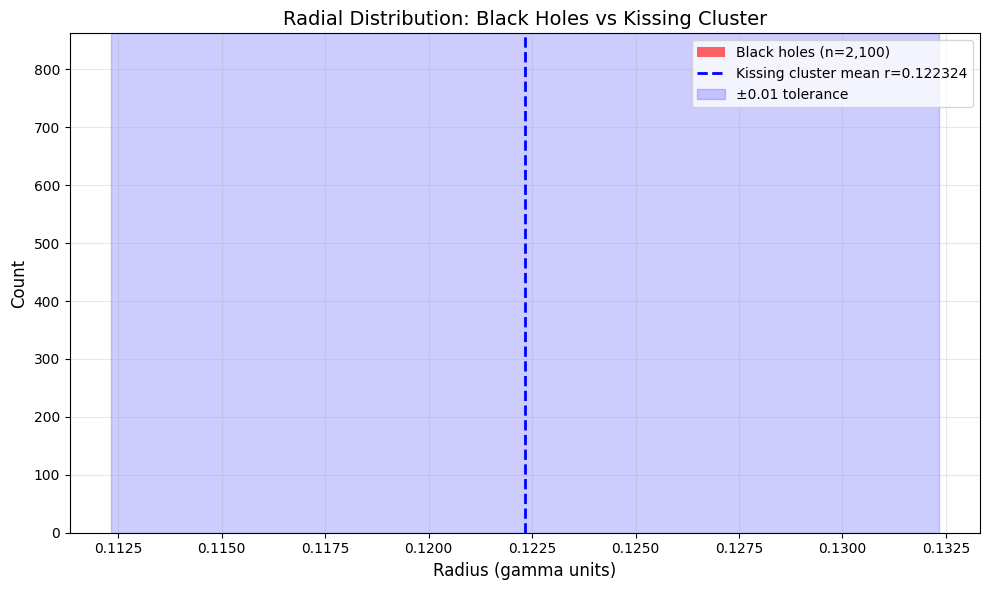

In [13]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Histogram of black hole radii
ax.hist(bh_r.cpu().numpy(), bins=100, alpha=0.6, label=f'Black holes (n={n_black_holes:,})', color='red')

# Mark kissing cluster mean radius
ax.axvline(kissing_r_mean, color='blue', linestyle='--', linewidth=2, 
           label=f'Kissing cluster mean r={kissing_r_mean:.6f}')

# Shade tolerance region
ax.axvspan(kissing_r_mean - r_tolerance, kissing_r_mean + r_tolerance, 
           alpha=0.2, color='blue', label=f'±{r_tolerance} tolerance')

ax.set_xlabel('Radius (gamma units)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Radial Distribution: Black Holes vs Kissing Cluster', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Angular Distribution: Sky Map

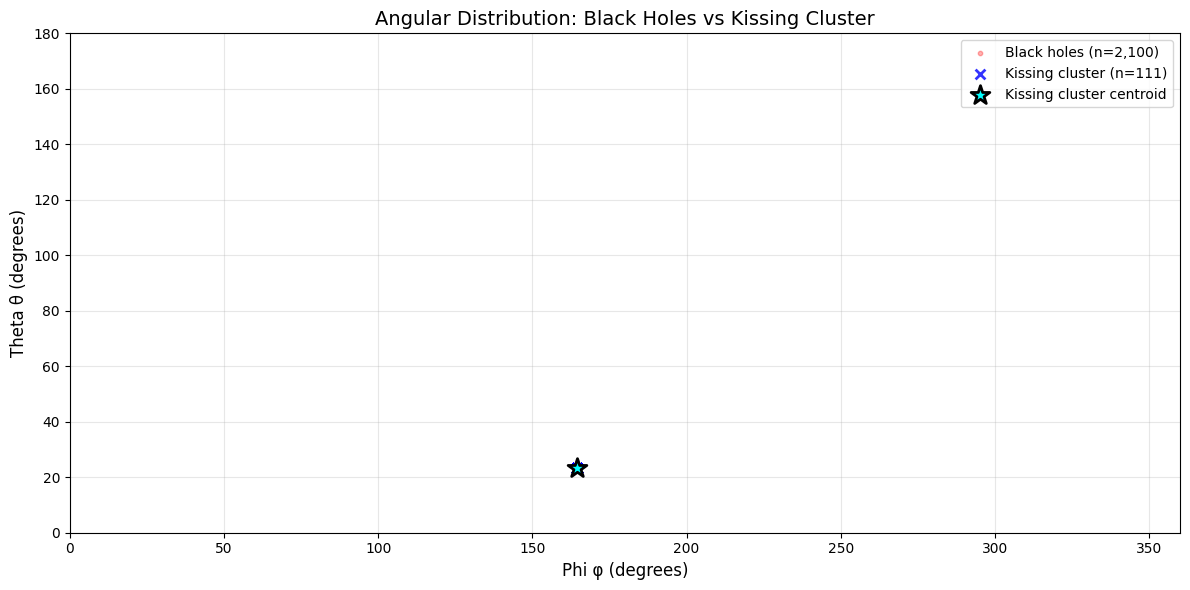

In [14]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# Black holes
ax.scatter(bh_phi.cpu().numpy(), bh_theta.cpu().numpy(),
           s=10, alpha=0.3, c='red', label=f'Black holes (n={n_black_holes:,})')

# Kissing cluster
ax.scatter(kissing_phi.cpu().numpy(), kissing_theta.cpu().numpy(),
           s=50, alpha=0.8, c='blue', marker='x', linewidths=2,
           label=f'Kissing cluster (n={n_kissing})')

# Mark kissing cluster mean
ax.scatter([kissing_phi_mean], [kissing_theta_mean],
           s=200, c='cyan', marker='*', edgecolors='black', linewidths=2,
           label='Kissing cluster centroid', zorder=10)

ax.set_xlabel('Phi φ (degrees)', fontsize=12)
ax.set_ylabel('Theta θ (degrees)', fontsize=12)
ax.set_title('Angular Distribution: Black Holes vs Kissing Cluster', fontsize=14)
ax.set_xlim(0, 360)
ax.set_ylim(0, 180)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### L2 Distance Distribution

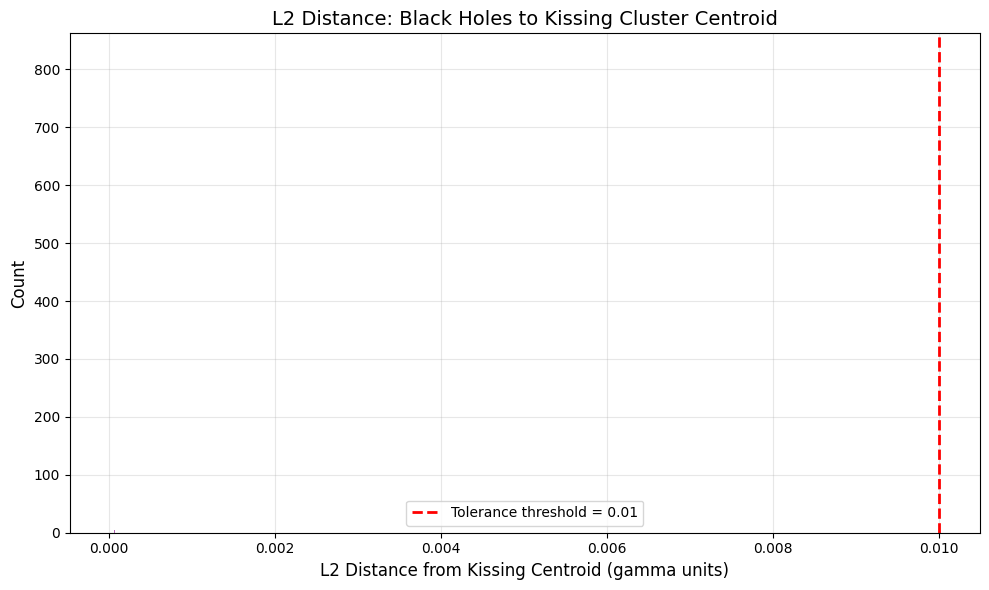

In [15]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Histogram of L2 distances
ax.hist(l2_distances.cpu().numpy(), bins=100, alpha=0.6, color='purple')

# Mark tolerance threshold
ax.axvline(l2_tolerance, color='red', linestyle='--', linewidth=2,
           label=f'Tolerance threshold = {l2_tolerance}')

ax.set_xlabel('L2 Distance from Kissing Centroid (gamma units)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('L2 Distance: Black Holes to Kissing Cluster Centroid', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion

**Summary of findings:**

1. **Radial concentration:** What fraction of black holes lie within r ± 0.01 of kissing cluster?
2. **Angular concentration:** What fraction lie within ±5° of kissing cluster angles?
3. **L2 proximity:** What fraction are within L2 distance < 0.01 from kissing centroid?

**Interpretation:**
- If majority of black holes satisfy all three conditions → they're part of same degenerate structure
- If only radial/angular concentration → they may be in same region but more dispersed
- If no concentration → black holes are scattered elsewhere (hypothesis rejected)

**Next steps if confirmed:**
- Decode both kissing cluster and nearby black holes to understand semantic similarity
- Search for other degenerate regions in token space
- Investigate why training drove these specific tokens to collapse